In [2]:
import csv

# Nombre del archivo CSV
csv_file = 'energy_values.csv'

# Nombre del archivo .mac
mac_file = 'output.mac'

# Leer los valores de energía desde el archivo CSV
with open(csv_file, 'r') as file:
    reader = csv.reader(file)
    energy_values = [row[0] for row in reader]  # Tomar solo el primer valor de cada fila

# Crear el archivo .mac
with open(mac_file, 'w') as file:
    for energy in energy_values:
        file.write(f"/gun/energy {energy} keV\n")
        file.write("/run/beamOn 10000\n\n")

print(f"Archivo {mac_file} generado exitosamente.")


Archivo output.mac generado exitosamente.


In [2]:
import csv
import os

# Nombre del archivo CSV
csv_file = 'energy_values.csv'

# Leer los valores de energía desde el archivo CSV
with open(csv_file, 'r') as file:
    reader = csv.reader(file)
    energy_values = [float(row[0]) for row in reader]  # Convertir los valores a float

# Definir los segmentos de energía con su respectivo targetThickness
segments = [
    (0.0061305, 0.01, '60nm'),
    (0.01, 0.05, '80nm'),
    (0.05, 0.1, '120nm'),
    (0.1, 0.9, '280nm'),
    (0.9, 3.5, '700nm'),
    (3.5, 6, '2200nm'),
    (6, 20, '9000nm'),
    (20, 25, '40000nm'),
    (25, 100, '0.1mm'),
    (100, 200, '1mm'),
    (200, 300, '5mm'),
    (300, 432.9451, '13mm')
]

# Crear un directorio para los archivos .mac si no existe
output_dir = 'mac_files'
os.makedirs(output_dir, exist_ok=True)

# Crear los archivos .mac para cada segmento
for idx, (min_energy, max_energy, thickness) in enumerate(segments, start=1):
    # Filtrar las energías que caen dentro del rango actual
    energies_in_segment = [energy for energy in energy_values if min_energy <= energy < max_energy]
    
    if not energies_in_segment:
        print(f"No se encontraron energías en el rango {min_energy} - {max_energy} keV. Se omitirá el archivo correspondiente.")
        continue  # Saltar si no hay energías en este segmento
    
    # Nombre del archivo basado en el índice y targetThickness
    mac_filename = f'd{idx}sim{thickness}.mac'
    mac_filepath = os.path.join(output_dir, mac_filename)
    
    with open(mac_filepath, 'w') as mac_file:
        # Escribir encabezados comunes si es necesario
        mac_file.write(f"/run/initialize\n\n")
        
        for energy in energies_in_segment:
            mac_file.write(f"/gun/energy {energy} keV\n")
            mac_file.write(f"/run/beamOn 10000\n\n")
    
    print(f"Archivo '{mac_filename}' generado exitosamente con {len(energies_in_segment)} energías.")



Archivo 'd1sim60nm.mac' generado exitosamente con 2 energías.
Archivo 'd2sim80nm.mac' generado exitosamente con 43 energías.
Archivo 'd3sim120nm.mac' generado exitosamente con 15 energías.
Archivo 'd4sim280nm.mac' generado exitosamente con 451 energías.
Archivo 'd5sim700nm.mac' generado exitosamente con 282 energías.
Archivo 'd6sim2200nm.mac' generado exitosamente con 33 energías.
Archivo 'd7sim9000nm.mac' generado exitosamente con 33 energías.
Archivo 'd8sim40000nm.mac' generado exitosamente con 4 energías.
Archivo 'd9sim0.1mm.mac' generado exitosamente con 26 energías.
Archivo 'd10sim1mm.mac' generado exitosamente con 10 energías.
Archivo 'd11sim5mm.mac' generado exitosamente con 6 energías.
Archivo 'd12sim13mm.mac' generado exitosamente con 5 energías.


In [10]:
import os

# Directorio donde están los archivos .mac
output_dir = 'mac_files'

# Inicializar contador total de líneas "/gun/energy"
total_gun_energy_lines = 0

# Iterar sobre todos los archivos en el directorio
for mac_filename in os.listdir(output_dir):
    if mac_filename.endswith('.mac'):
        mac_filepath = os.path.join(output_dir, mac_filename)
        
        # Contar las líneas que contienen "/gun/energy" en el archivo actual
        with open(mac_filepath, 'r') as mac_file:
            gun_energy_lines = sum(1 for line in mac_file if "/gun/energy" in line)
            total_gun_energy_lines += gun_energy_lines
            print(f"Archivo '{mac_filename}': {gun_energy_lines} líneas '/gun/energy'.")

# Mostrar el total de líneas "/gun/energy"
print(f"Total de líneas '/gun/energy' en todos los archivos .mac: {total_gun_energy_lines}")


Archivo 'd10sim1mm.mac': 10 líneas '/gun/energy'.
Archivo 'd11sim5mm.mac': 6 líneas '/gun/energy'.
Archivo 'd12sim13mm.mac': 6 líneas '/gun/energy'.
Archivo 'd1sim60nm.mac': 2 líneas '/gun/energy'.
Archivo 'd2sim80nm.mac': 43 líneas '/gun/energy'.
Archivo 'd3sim120nm.mac': 15 líneas '/gun/energy'.
Archivo 'd4sim280nm.mac': 451 líneas '/gun/energy'.
Archivo 'd5sim700nm.mac': 282 líneas '/gun/energy'.
Archivo 'd6sim2200nm.mac': 33 líneas '/gun/energy'.
Archivo 'd7sim9000nm.mac': 33 líneas '/gun/energy'.
Archivo 'd8sim40000nm.mac': 4 líneas '/gun/energy'.
Archivo 'd9sim0.1mm.mac': 26 líneas '/gun/energy'.
Total de líneas '/gun/energy' en todos los archivos .mac: 911


In [13]:
# Nombre del archivo de script batch
batch_file = 'run_simulations.bat'

# Lista de segmentos y archivos generados
segments = [
    'd1sim60nm',
    'd2sim80nm',
    'd3sim120nm',
    'd4sim280nm',
    'd5sim700nm',
    'd6sim2200nm',
    'd7sim9000nm',
    'd8sim40000nm',
    'd9sim0.1mm',
    'd10sim1mm',
    'd11sim5mm',
    'd12sim13mm'
]

# Crear el archivo batch
with open(batch_file, 'w') as file:
    for segment in segments:
        file.write(f"cd {segment}\\Release\n")
        file.write(f".\\PCM.exe {segment}.mac\n")
        file.write("cd ..\n")  # Regresar al directorio principal
        file.write("cd ..\n")  # Regresar al directorio principal

print(f"Archivo {batch_file} generado exitosamente.")


Archivo run_simulations.bat generado exitosamente.


In [6]:
import os
import shutil

# Lista de carpetas en orden
folders = [
    'd1sim60nm',
    'd2sim80nm',
    'd3sim120nm',
    'd4sim280nm',
    'd5sim700nm',
    'd6sim2200nm',
    'd7sim9000nm',
    'd8sim40000nm',
    'd9sim0.1mm',
    'd10sim1mm',
    'd11sim5mm',
    'd12sim13mm'
]

# Ruta base de las carpetas y de destino
base_path = 'C:\\Users\\conej\\Documents\\Universidad\\Geant4\\Projects\\Git\\G4-PCM'
destination_folder = os.path.join(base_path, 'OrderedRootFiles')

# Crear la carpeta de destino si no existe
os.makedirs(destination_folder, exist_ok=True)

# Contador para los archivos renombrados
counter = 1

# Recorrer cada carpeta en el orden especificado
for folder in folders:
    release_folder = os.path.join(base_path, folder, 'Release')
    
    # Listar todos los archivos .root en la carpeta Release
    root_files = [f for f in os.listdir(release_folder) if f.startswith('NTuples_Run') and f.endswith('.root')]
    
    # Copiar y renombrar cada archivo .root
    for root_file in root_files:
        source_file = os.path.join(release_folder, root_file)
        destination_file = os.path.join(destination_folder, f'E{counter}.root')
        shutil.copyfile(source_file, destination_file)
        counter += 1

print(f"Archivos copiados y renombrados exitosamente en {destination_folder}.")


Archivos copiados y renombrados exitosamente en C:\Users\conej\Documents\Universidad\Geant4\Projects\Git\G4-PCM\OrderedRootFiles.


In [5]:
import os

# Lista de carpetas
folders = [
    'd1sim60nm',
    'd2sim80nm',
    'd3sim120nm',
    'd4sim280nm',
    'd5sim700nm',
    'd6sim2200nm',
    'd7sim9000nm',
    'd8sim40000nm',
    'd9sim0.1mm',
    'd10sim1mm',
    'd11sim5mm',
    'd12sim13mm'
]

# Ruta base donde se encuentran las carpetas
base_path = r'C:\\Users\\conej\\Documents\\Universidad\\Geant4\\Projects\\Git\\G4-PCM'

# Contador para los archivos NTuples
ntuple_count = 0

# Recorre cada carpeta en la lista
for folder in folders:
    folder_path = os.path.join(base_path, folder, 'Release')
    if os.path.exists(folder_path):
        # Recorre el directorio de la carpeta y sus subdirectorios
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                if file.startswith('NTuples_Run') and file.endswith('.root'):
                    ntuple_count += 1
    else:
        print(f"Advertencia: La carpeta {folder_path} no existe.")

print(f"Total de archivos NTuples en todas las carpetas: {ntuple_count}")


Total de archivos NTuples en todas las carpetas: 902


In [8]:
import ROOT
import os
import csv

# Define la ruta base
base_path = r'C:\\Users\\conej\\Documents\\Universidad\\Geant4\\Projects\\Git\\G4-PCM\\OrderedRootFiles'

# Ruta donde se almacenan los archivos CSV
csv_file = r'C:\\Users\\conej\\Documents\\Universidad\\Geant4\\Projects\\Git\\G4-PCM\\energy_summary.csv'

# Abre el archivo CSV para escribir
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    # Escribe la cabecera del CSV
    writer.writerow(['File', 'Entries', 'Mean', 'Max Energy'])
    
    # Recorre cada archivo en la carpeta base
    for file_name in os.listdir(base_path):
        if file_name.startswith('E') and file_name.endswith('.root'):
            file_path = os.path.join(base_path, file_name)
            try:
                # Abre el archivo ROOT
                root_file = ROOT.TFile(file_path)
                tree = root_file.Get('G4_PCM')
                
                if tree:
                    # Accede a la rama "Energy" del NTuple
                    branch = tree.GetBranch('Energy')
                    
                    # Recorre las entradas para calcular estadísticas
                    entries = branch.GetEntries()
                    
                    # Calcula la media y el máximo de energía
                    mean = 0
                    max_energy = float('-inf')
                    
                    for entry in range(entries):
                        branch.GetEntry(entry)
                        energy_value = branch.GetLeaf('Energy').GetValue()
                        mean += energy_value
                        if energy_value > max_energy:
                            max_energy = energy_value
                    
                    # Calcula la media
                    mean /= entries
                    
                    # Escribe los datos en el CSV
                    writer.writerow([file_name, entries, mean, max_energy])
                    
                root_file.Close()
            except Exception as e:
                print(f"Error procesando {file_path}: {e}")
                
print(f"Archivo CSV '{csv_file}' generado exitosamente.")


Archivo CSV 'C:\\Users\\conej\\Documents\\Universidad\\Geant4\\Projects\\Git\\G4-PCM\\energy_summary.csv' generado exitosamente.


In [9]:
import csv
import numpy as np

# Ruta de los archivos CSV
energy_summary_file = r'energy_summary.csv'
energy_values_file = r'energy_values.csv'
output_file = r'energy_summary_with_E0.csv'

# Leer los valores de energía desde energy_values.csv
energy_values = []
with open(energy_values_file, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        try:
            energy_values.append(float(row[0]))
        except ValueError:
            continue

# Convertir la lista de valores de energía a un array de numpy para cálculos eficientes
energy_values = np.array(energy_values)

# Leer energy_summary.csv, calcular la energía más cercana y escribir el nuevo archivo CSV
with open(energy_summary_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    
    # Leer la cabecera y añadir la nueva columna
    headers = next(reader)
    headers.append('E0')
    writer.writerow(headers)
    
    for row in reader:
        file_name, entries, mean, max_energy = row
        max_energy = float(max_energy)
        
        # Encontrar el valor más cercano en energy_values
        closest_energy = min(energy_values, key=lambda x: abs(x - max_energy))
        
        # Escribir la fila con el nuevo valor
        writer.writerow(row + [closest_energy])

print(f"Archivo CSV '{output_file}' generado exitosamente.")


Archivo CSV 'energy_summary_with_E0.csv' generado exitosamente.


In [10]:
import csv

# Rutas de los archivos CSV
input_file = r'energy_summary_with_E0.csv'
output_file = r'energy_summary_with_thickness.csv'

# Definir los rangos de energía y sus grosores en metros
thicknesses = [
    (0.00613050000, 0.01, 60e-9),    # 60 nm = 60 * 10^-9 m
    (0.01, 0.05, 80e-9),             # 80 nm = 80 * 10^-9 m
    (0.05, 0.1, 120e-9),            # 120 nm = 120 * 10^-9 m
    (0.1, 0.9, 280e-9),            # 280 nm = 280 * 10^-9 m
    (0.9, 3.5, 700e-9),            # 700 nm = 700 * 10^-9 m
    (3.5, 6, 2200e-9),             # 2200 nm = 2200 * 10^-9 m
    (6, 20, 9000e-9),             # 9000 nm = 9000 * 10^-9 m
    (20, 25, 40000e-9),           # 40000 nm = 40000 * 10^-9 m
    (25, 100, 0.1e-3),            # 0.1 mm = 0.1 * 10^-3 m
    (100, 200, 1e-3),             # 1 mm = 1 * 10^-3 m
    (200, 300, 5e-3),             # 5 mm = 5 * 10^-3 m
    (300, 432.9451, 13e-3)        # 13 mm = 13 * 10^-3 m
]

# Función para obtener el grosor en metros basado en el valor de energía
def get_thickness(energy_value):
    for lower_bound, upper_bound, thickness in thicknesses:
        if lower_bound <= energy_value < upper_bound:
            return thickness
    return None  # Para valores fuera del rango

# Leer energy_summary_with_E0.csv y añadir la columna de grosor
with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    
    # Leer la cabecera y añadir la nueva columna
    headers = next(reader)
    headers.append('Thickness (m)')
    writer.writerow(headers)
    
    for row in reader:
        file_name, entries, mean, max_energy, e0 = row
        e0 = float(e0)
        
        # Obtener el grosor para el valor de E0
        thickness = get_thickness(e0)
        
        # Escribir la fila con el nuevo valor
        writer.writerow(row + [thickness])

print(f"Archivo CSV '{output_file}' generado exitosamente.")


Archivo CSV 'energy_summary_with_thickness.csv' generado exitosamente.


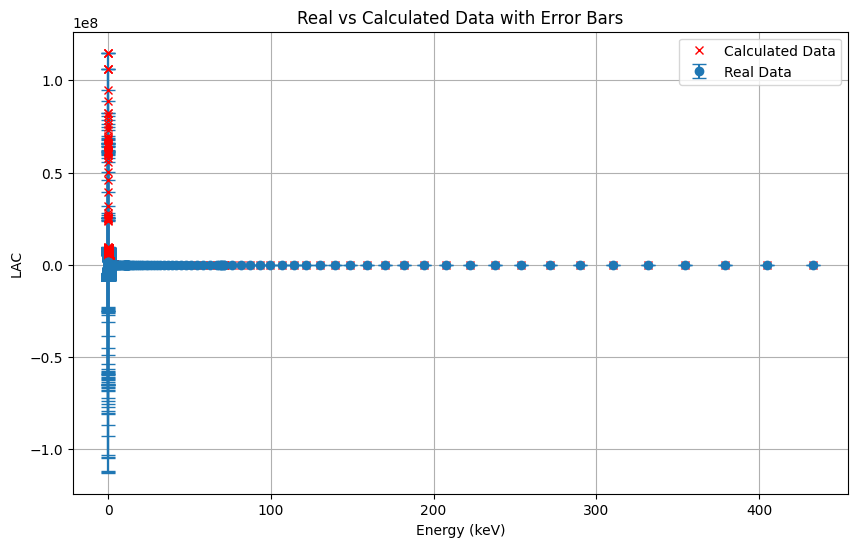

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leer los datos de los archivos CSV
real_df = pd.read_csv('real.csv')
calc_df = pd.read_csv('calc.csv')

# Asegúrate de que los nombres de las columnas sean los mismos en ambos archivos
# Si es necesario, ajusta los nombres de las columnas en el código a continuación

# Extraer los datos de Energy y LAC
energy_real = real_df['Energy']
lac_real = real_df['LAC']

energy_calc = calc_df['Energy']
lac_calc = calc_df['LAC']

# Convertir a DataFrames para un manejo más fácil
real_df = pd.DataFrame({'Energy': energy_real, 'LAC': lac_real})
calc_df = pd.DataFrame({'Energy': energy_calc, 'LAC': lac_calc})

# Unir los DataFrames por la columna 'Energy' para encontrar los valores comunes
merged_df = pd.merge(real_df, calc_df, on='Energy', suffixes=('_real', '_calc'))

# Calcular el error como la diferencia absoluta entre los valores reales y calculados
merged_df['Error'] = np.abs(merged_df['LAC_real'] - merged_df['LAC_calc'])

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.errorbar(merged_df['Energy'], merged_df['LAC_real'], yerr=merged_df['Error'], fmt='o', label='Real Data', capsize=5)
plt.plot(merged_df['Energy'], merged_df['LAC_calc'], 'x', label='Calculated Data', color='red')

# Etiquetas y título
plt.xlabel('Energy (keV)')
plt.ylabel('LAC')
plt.title('Real vs Calculated Data with Error Bars')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()


In [16]:
import pandas as pd

# Leer los datos de los archivos CSV
real_df = pd.read_csv('real.csv')
calc_df = pd.read_csv('calc.csv')

# Imprimir nombres de columnas para verificar
print("Column names in real.csv:", real_df.columns)
print("Column names in calc.csv:", calc_df.columns)


Column names in real.csv: Index(['Energy', 'LAC'], dtype='object')
Column names in calc.csv: Index(['Energy', 'LAC'], dtype='object')


Column names in real.csv: Index(['Energy', 'LAC'], dtype='object')
Column names in calc.csv: Index(['Energy', 'LAC'], dtype='object')


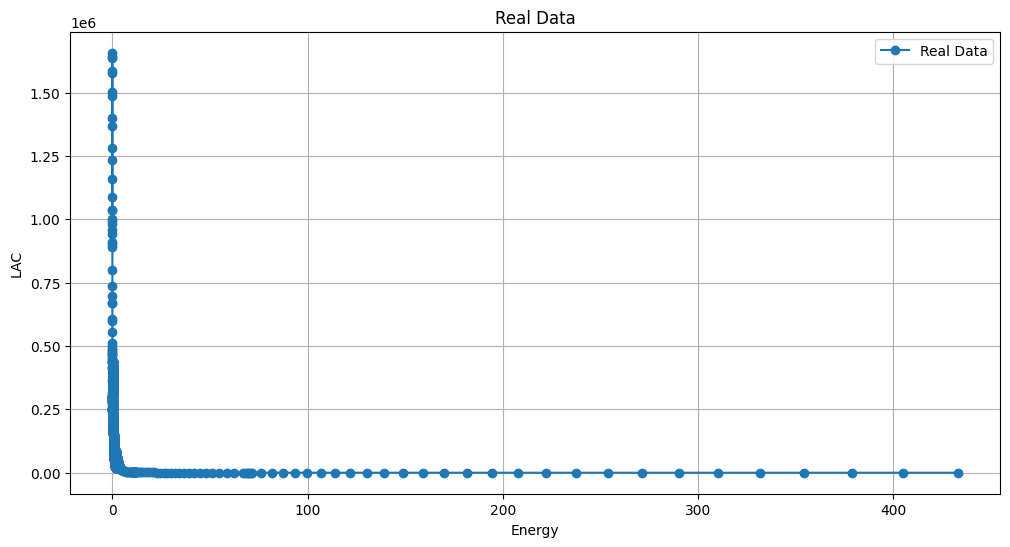

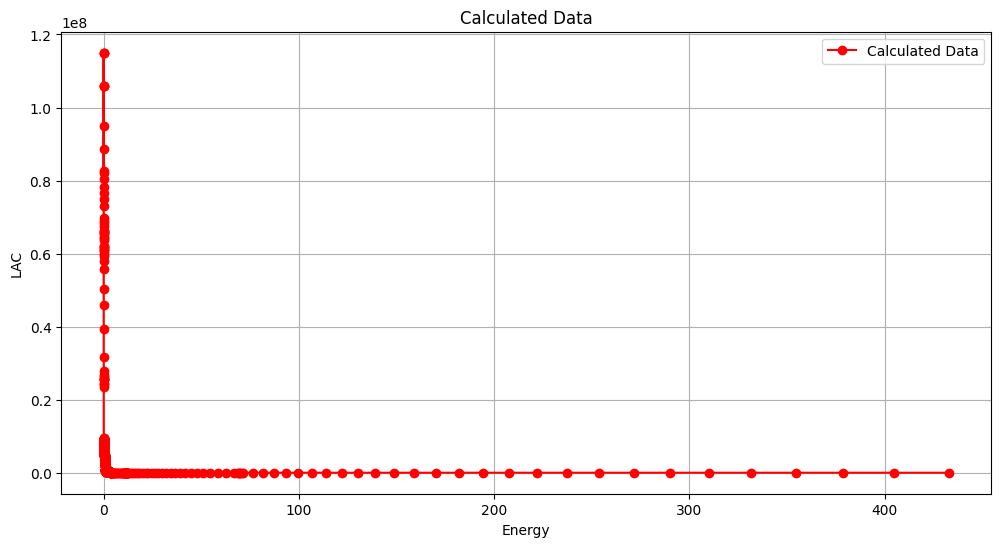

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer los datos de los archivos CSV
real_df = pd.read_csv('real.csv')
calc_df = pd.read_csv('calc.csv')

# Imprimir nombres de columnas para verificar
print("Column names in real.csv:", real_df.columns)
print("Column names in calc.csv:", calc_df.columns)

# Ajusta los nombres de columnas si es necesario
energy_real_col = 'Energy'  # Cambia esto si es necesario
lac_real_col = 'LAC'  # Cambia esto si es necesario
energy_calc_col = 'Energy'  # Cambia esto si es necesario
lac_calc_col = 'LAC'  # Cambia esto si es necesario

# Extraer los datos de Energy y LAC
energy_real = real_df[energy_real_col]
lac_real = real_df[lac_real_col]

energy_calc = calc_df[energy_calc_col]
lac_calc = calc_df[lac_calc_col]

# Graficar los datos de real.csv
plt.figure(figsize=(12, 6))
plt.plot(energy_real, lac_real, 'o-', label='Real Data')
plt.xlabel('Energy')
plt.ylabel('LAC')
plt.title('Real Data')
plt.legend()
plt.grid(True)
plt.show()

# Graficar los datos de calc.csv
plt.figure(figsize=(12, 6))
plt.plot(energy_calc, lac_calc, 'o-', color='r', label='Calculated Data')
plt.xlabel('Energy')
plt.ylabel('LAC')
plt.title('Calculated Data')
plt.legend()
plt.grid(True)
plt.show()


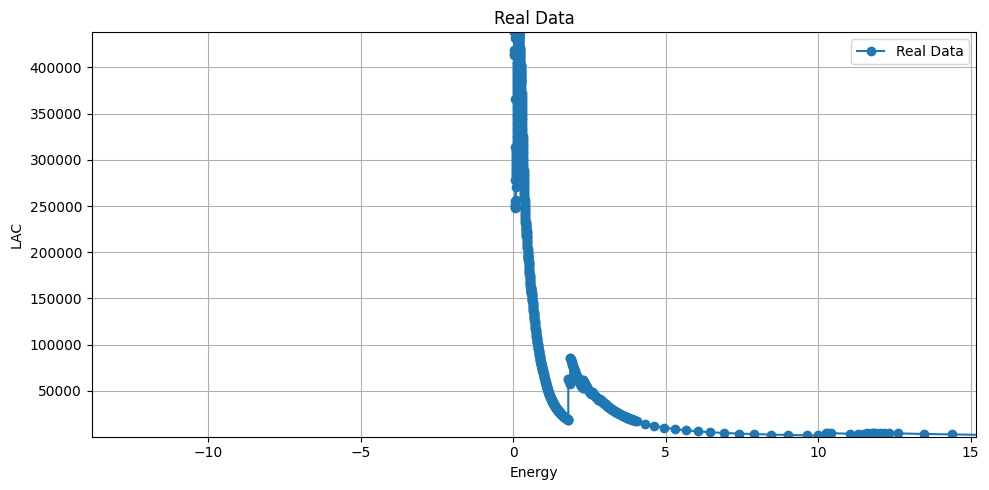

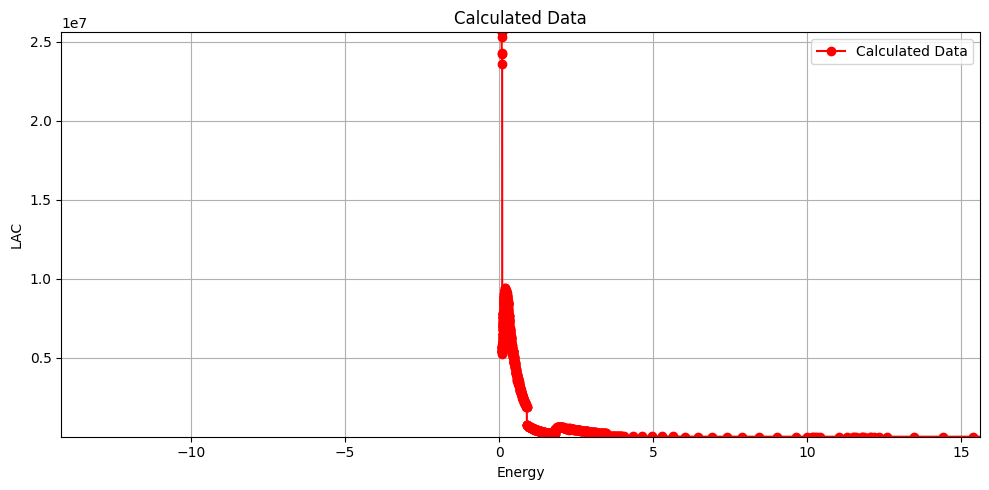

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leer los datos de los archivos CSV
real_df = pd.read_csv('real.csv')
calc_df = pd.read_csv('calc.csv')

# Ajusta los nombres de columnas si es necesario
energy_real_col = 'Energy'
lac_real_col = 'LAC'
energy_calc_col = 'Energy'
lac_calc_col = 'LAC'

# Extraer los datos de Energy y LAC
energy_real = real_df[energy_real_col]
lac_real = real_df[lac_real_col]

energy_calc = calc_df[energy_calc_col]
lac_calc = calc_df[lac_calc_col]

# Crear las figuras con un tamaño más compacto
fig, ax = plt.subplots(figsize=(10, 5))

# Graficar los datos reales
ax.plot(energy_real, lac_real, 'o-', label='Real Data')
ax.set_xlabel('Energy')
ax.set_ylabel('LAC')
ax.set_title('Real Data')
ax.legend()
ax.grid(True)

# Ajustar el zoom en los valores centrales
median_energy_real = np.median(energy_real)
energy_range_real = np.percentile(energy_real, 95) - np.percentile(energy_real, 5)
ax.set_xlim(left=median_energy_real - 0.5 * energy_range_real, 
            right=median_energy_real + 0.5 * energy_range_real)
ax.set_ylim(bottom=np.percentile(lac_real, 5), 
            top=np.percentile(lac_real, 95))

plt.tight_layout()
plt.show()

# Crear la segunda figura
fig, ax = plt.subplots(figsize=(10, 5))

# Graficar los datos calculados
ax.plot(energy_calc, lac_calc, 'o-', color='r', label='Calculated Data')
ax.set_xlabel('Energy')
ax.set_ylabel('LAC')
ax.set_title('Calculated Data')
ax.legend()
ax.grid(True)

# Ajustar el zoom en los valores centrales
median_energy_calc = np.median(energy_calc)
energy_range_calc = np.percentile(energy_calc, 95) - np.percentile(energy_calc, 5)
ax.set_xlim(left=median_energy_calc - 0.5 * energy_range_calc, 
            right=median_energy_calc + 0.5 * energy_range_calc)
ax.set_ylim(bottom=np.percentile(lac_calc, 5), 
            top=np.percentile(lac_calc, 95))

plt.tight_layout()
plt.show()


In [26]:
import pandas as pd
import numpy as np

# Leer los datos de los archivos CSV
real_df = pd.read_csv('real.csv')
calc_df = pd.read_csv('calc.csv')

# Ajustar los nombres de columnas si es necesario
energy_real_col = 'Energy'
lac_real_col = 'LAC'
energy_calc_col = 'Energy'
lac_calc_col = 'LAC'

# Extraer los datos de Energy y LAC
energy_real = real_df[energy_real_col]
lac_real = real_df[lac_real_col]

energy_calc = calc_df[energy_calc_col]
lac_calc = calc_df[lac_calc_col]

# Crear un DataFrame para almacenar los resultados
error_df = pd.DataFrame(columns=['Energy', 'Real_LAC', 'Calc_LAC', 'Error'])

# Alinear los datos por Energy
common_energies = np.intersect1d(energy_real, energy_calc)

# Filtrar los LAC para las energías comunes
real_lac_common = np.array([lac_real[energy_real == e].values[0] for e in common_energies])
calc_lac_common = np.array([lac_calc[energy_calc == e].values[0] for e in common_energies])

# Calcular el error (en este caso, el error absoluto)
errors = np.abs(real_lac_common - calc_lac_common)

# Crear el DataFrame de errores
error_df['Energy'] = common_energies
error_df['Real_LAC'] = real_lac_common
error_df['Calc_LAC'] = calc_lac_common
error_df['Error'] = errors

# Guardar el DataFrame de errores a un archivo CSV
error_df.to_csv('error_summary.csv', index=False)

print("Archivo error_summary.csv generado exitosamente.")


Archivo error_summary.csv generado exitosamente.


In [24]:
import pandas as pd
import numpy as np

# Leer los datos de los archivos CSV
real_df = pd.read_csv('real.csv')
calc_df = pd.read_csv('calc.csv')

# Ajustar los nombres de columnas si es necesario
energy_real_col = 'Energy'
lac_real_col = 'LAC'
energy_calc_col = 'Energy'
lac_calc_col = 'LAC'

# Extraer los datos de Energy y LAC
energy_real = real_df[energy_real_col]
lac_real = real_df[lac_real_col]

energy_calc = calc_df[energy_calc_col]
lac_calc = calc_df[lac_calc_col]

# Alinear los datos por Energy
common_energies = np.intersect1d(energy_real, energy_calc)

# Filtrar los LAC para las energías comunes
real_lac_common = np.array([lac_real[energy_real == e].values[0] for e in common_energies])
calc_lac_common = np.array([lac_calc[energy_calc == e].values[0] for e in common_energies])

# Calcular el error (en este caso, el error absoluto)
errors = np.abs(real_lac_common - calc_lac_common)

# Cálculo de errores globales
mae = np.mean(errors)  # Error Absoluto Medio
mse = np.mean(errors**2)  # Error Cuadrático Medio
rmse = np.sqrt(mse)  # Raíz del Error Cuadrático Medio

# Imprimir los valores globales
print(f"Error Absoluto Medio (MAE): {mae:.2e}")
print(f"Error Cuadrático Medio (MSE): {mse:.2e}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2e}")


Error Absoluto Medio (MAE): 6.63e+06
Error Cuadrático Medio (MSE): 2.77e+14
Raíz del Error Cuadrático Medio (RMSE): 1.66e+07


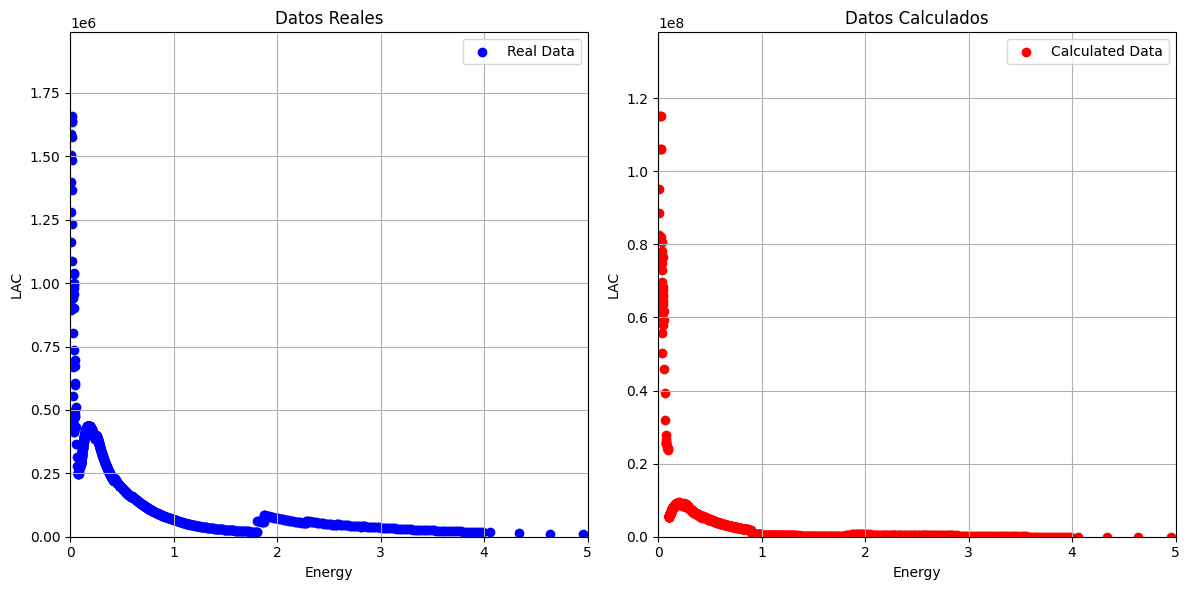

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer los datos de los archivos CSV
real_df = pd.read_csv('real.csv')
calc_df = pd.read_csv('calc.csv')

# Ajustar los nombres de columnas si es necesario
energy_real_col = 'Energy'
lac_real_col = 'LAC'
energy_calc_col = 'Energy'
lac_calc_col = 'LAC'

# Extraer los datos de Energy y LAC
energy_real = real_df[energy_real_col]
lac_real = real_df[lac_real_col]

energy_calc = calc_df[energy_calc_col]
lac_calc = calc_df[lac_calc_col]

# Filtrar los datos para que sólo se muestren los valores entre 0 y 5
mask_real = (energy_real >= 0) & (energy_real <= 5)
mask_calc = (energy_calc >= 0) & (energy_calc <= 5)

# Aplicar el filtro a los datos
filtered_energy_real = energy_real[mask_real]
filtered_lac_real = lac_real[mask_real]
filtered_energy_calc = energy_calc[mask_calc]
filtered_lac_calc = lac_calc[mask_calc]

# Crear la gráfica para los datos reales
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(filtered_energy_real, filtered_lac_real, color='blue', label='Real Data')
plt.title('Datos Reales')
plt.xlabel('Energy')
plt.ylabel('LAC')
plt.xlim(0, 5)
plt.ylim(0, 1.2 * filtered_lac_real.max())  # Ajustar límite superior de Y según los datos
plt.grid(True)
plt.legend()

# Crear la gráfica para los datos calculados
plt.subplot(1, 2, 2)
plt.scatter(filtered_energy_calc, filtered_lac_calc, color='red', label='Calculated Data')
plt.title('Datos Calculados')
plt.xlabel('Energy')
plt.ylabel('LAC')
plt.xlim(0, 5)
plt.ylim(0, 1.2 * filtered_lac_calc.max())  # Ajustar límite superior de Y según los datos
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
